In [1]:
import Segmantation_lib as sg
import pandas as pd
import sys

In [2]:
path_to_root='/people/berhe/Bureau/TLP_thesis/SegmentationPaperResources'
shot='/people/berhe/Bureau/video/GameOfThrones.Season01.Episode01_threshold_1.1.json'
shotStart,shotEnd=sg.getShots(shot)

shotsBB='/people/berhe/Bureau/video/BreakingBad.Season01.Episode01_threshold_1.6.json'
shotStartBB,shotEndBB=sg.getShots(shotsBB)
sys.path.insert(0,path_to_root)

In [3]:
data = pd.read_csv(path_to_root+'/AnnotatedScene/Got/season1/Shots/shots_S01E01', delimiter="\t")
dataBB = pd.read_csv(path_to_root+'/AnnotatedScene/BreakingBad/season1/Shots/shots_S01E01', delimiter="\t")

In [4]:
dataBB.columns

Index(['shot', 'start', 'end'], dtype='object')

In [5]:
print(len(shotEnd))

1107


In [6]:
hyp=shotEnd[0:100]
ref=data['end'][0:100]
ref=[float(i/1000) for i in ref]
hyp1=shotStart[100:300]
ref1=data['start'][100:300]
ref1=[i/1000 for i in ref1]

hypBB=shotEndBB[0:100]
refBB=dataBB['end'][0:100]
refBB=[i/1000 for i in refBB]
hyp1BB=shotStartBB[100:300]
ref1BB=data['start'][100:300]
ref1BB=[i/1000 for i in ref1BB]

In [7]:
from pyannote.core import Annotation, Segment

In [8]:
len(ref),len(hyp)

(100, 100)

In [9]:
ref[-1],hyp[-1]

(379.8, 381.56)

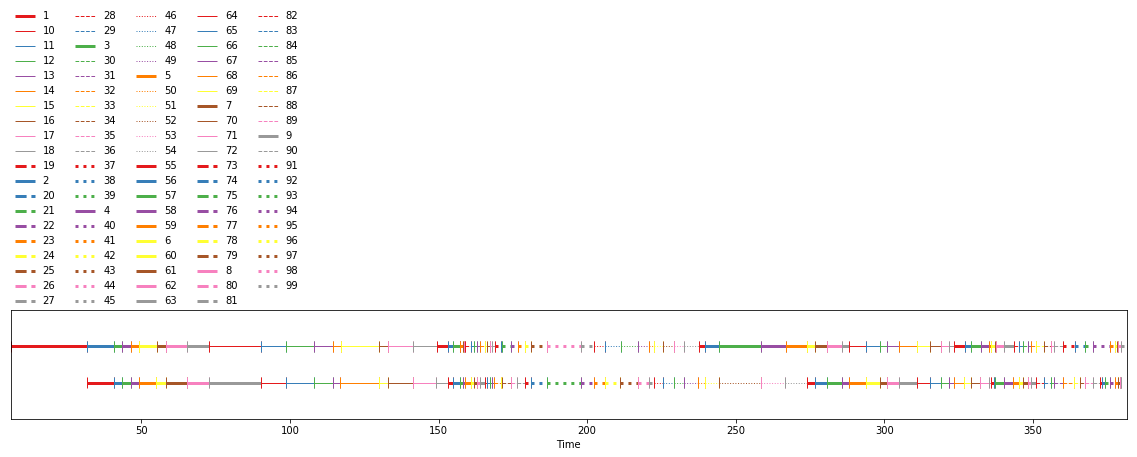

In [10]:
shotPyannote = Annotation()
for i in range(1,len(hyp)):
    shotPyannote[Segment(ref[i-1], ref[i])] = str(i)
    shotPyannote[Segment(hyp[i-1], hyp[i])] = str(i)
shotPyannote

In [11]:
import matplotlib.pylab as plt
def drawBoundry(refernceList,hypothesisList,pos1,pos2):
    ref=refernceList[pos1:pos2]
    hyp=hypothesisList[pos1:pos2]
    for segment in ref:
        plt.plot([segment, segment], [-5, -0.5], 'r')
    for segment in hyp:
        plt.plot([segment, segment], [0.5, 5], 'g')
    plt.ylim(-11, 11);
    plt.xlim(ref[pos1],hypothesisList[-1]);
    plt.xlabel('Time (seconds)');

In [12]:
dataBB['end'][0]/1000,shotEndBB[0]

(6.44, 6.48)

In [13]:
dataBB['end'][1],shotEndBB[1]

(10320, 10.36)

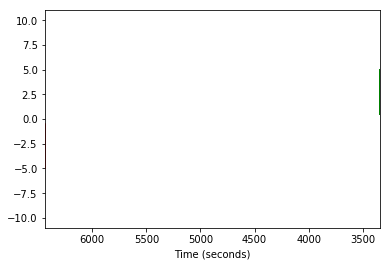

In [14]:
drawBoundry(refBB,shotEndBB,0,len(shotEndBB))

In [71]:
shot='/people/berhe/Bureau/video/GameOfThrones.Season01.Episode01_threshold_1.5.json'
shotStart,shotEnd=sg.getShots(shot)

shotsBB='/people/berhe/Bureau/video/BreakingBad.Season01.Episode01_threshold_1.5.json'
shotStartBB,shotEndBB=sg.getShots(shotsBB)
print('Braking bad--> makarand: {} pyannote: {}'.format(len(dataBB),len(shotEndBB)))
print('Game of Thrones--> makarand: {} pyannote: {}'.format(len(data),len(shotEnd)))

Braking bad--> makarand: 818 pyannote: 810
Game of Thrones--> makarand: 982 pyannote: 980


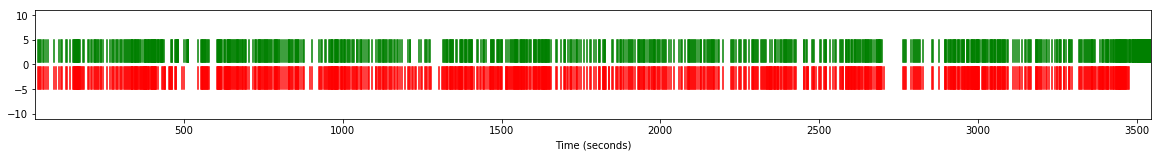

In [74]:
makarShot=[data['end'][i]/1000 for i in range(len(data))]
drawBoundry(makarShot,shotEnd,0,len(shotEnd))

In [24]:
makarShot=[dataBB['end'][i]/1000 for i in range(len(dataBB))]
drawBoundry(makarShot,shotEndBB,0,len(shotEndBB))

818

In [62]:
df=pd.read_csv('/people/berhe/Bureau/TLP_thesis/codes/AnnotatedScene/BreakingBad/season1/Scenes/S01E01')

In [64]:
print(df.columns)

Index(['Scene\tstart\tend'], dtype='object')
